# Linear regression
Suppose there are $m$ data points, each with $n$ predictors (known features) and $t$ targets (unknown features in the test set). 

Store the predictors in the matrix $X$, which is an $m \times n$ matrix, with each row corresponding to one data point.

Store the targets in the matrix $Y$, which is an $m \times t$ matrix, corresponding to $X$ (i.e., the rows of $X$ and $Y$ are one-to-one mapped). 

In the lecture, we only consider a single target variable. Here $Y$ consists of $t$ target variables. The closed form solution is the same as we had derived in this [video](https://oakland.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=01a9d556-4e95-4079-b028-ad980025411a).

Mathematically, linear regression solves this optimization problem:

Given $X$ and $Y$, find the best $W$ and $b$ such that

$$Y \approx XW + b$$

Linear regression then solves this optimization problem:

$$W^*, b^* = \underset{W, b}{\operatorname{argmin}} ||Y - (XW + b)||^{2}$$

Here, $W$ is a $n \times t$ weight matrix, $b$ is a bias vector of length $t$.

Now let's use a trick to absort $b$ into $W$. 

Let $X_{extend}=[X, \bf{1}]$, i.e., append a column of 1 to the last column of $X$. Here $\bf{1}$$=[1,1,\cdots,1]^T$ is  a column vector of length $m$ with every element being 1.


\begin{equation*}
W_{extend} = 
\begin{bmatrix}
W \\
b
\end{bmatrix}
\end{equation*}

Now $W^*_{extend}$ is a $(n+1) \times t$ matrix, with the first $n$ row corresponding to $W^*$ and the last row $b^*$.

For your information, the closed form solution with linear regression is 

$$W^*_{extend}=(X^{T}_{extend}X_{extend})^{-1}X^{T}_{extend}Y$$

You can then read out $W^*, b^*$ directly from $W^*_{extend}$

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [351]:
def linear_regression_params(X, Y):
    """Given a set of data points stored in X and Y, find the best weight matrix and bias
    
    Arguments:
        X: 2D numpy array with shape (num_points, num_features)
        Y: 2D numpy array with shape (num_points, num_targets)
            
    Returns:
        W: 2D numpy array with shape (num_features, num_targets)
        b: b is a 1D numpy array with shape (num_targets,)
    """
    W = None
    b = None
    ################################################################################
    ######################### Write your code in this block (20 points) ############
    ## 20 points ##
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    #W_extended = np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,Y))
    #W_extended = ((X.T).dot(X))
    ones = np.ones((X.shape[0],1))
    X = np.append(X, ones, 1)
    W_extended = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))
    
    
    
    
    W_shape = W_extended.shape
    
    W = W_extended[:W_extended.shape[0]-1]
    b = W_extended[W_extended.shape[0]-1:]
    
#     print(X.shape)
#     print(Y.shape)
#     print(W_extended)
#     print(W_shape)
#     print(W.shape)
#     print(b.shape)




    
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return W, b


def linear_regression_predict(W, b, X_test):
    """Given weight matrix W and bias vector b (b can be None), predict the target matrix for X_test
    
    Arguments:
        W: 2D numpy array with shape (num_features, num_targets)
        b: b can be a 1D numpy array with shape (num_targets,) or b is None
        X_test: 2D numpy array with shape (num_points, num_features)
        
    Returns:
        Y_test: 2D numpy array with shape (num_points, num_targets)
    
    """
    Y_test = None
    ################################################################################
    ######################### Write your code in this block (5 points) #############
    ## 5 points ##
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    if b is None:
        Y_test = X_test.dot(W)
    else:
        Y_test = X_test.dot(W) + b


    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return Y_test

# Evaluate your implementation
After you have implemented the above two functions: linear_regression_params and linear_regression_predict
Use the following code to evaluate your implementation.

In [352]:
def generate_evaluation_data(num_features, num_targets, noise_level=1):
    w_true = np.random.uniform(-5, 5, (num_features, num_targets))
    b_true = np.random.uniform(-10, 10, (num_targets,))
    
    x_train = np.random.uniform(1, 10, (100, num_features))
    y_train = x_train.dot(w_true) + b_true
    noise = np.random.randn(*y_train.shape) * noise_level
    y_train += noise
    
    x_test = np.random.uniform(1, 10, (200, num_features))
    y_test = x_test.dot(w_true) + b_true
    
    return (x_train, y_train), (x_test, y_test), (w_true, b_true)

num_features = 1, num_targets = 1


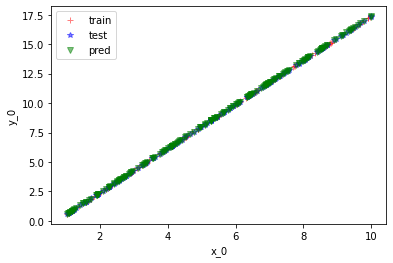

True parameters: w_true=[[1.87330453]], b_true=[-1.34657236]
Learned parameters: w=[[1.87408043]], b=[[-1.35061707]]
The distance between w_true and w: 0.0007759053522855552
The distance between b_true and b: 0.004044708430273047
The distance between y_pred and y_test: 0.027801657058098117


num_features = 10, num_targets = 1


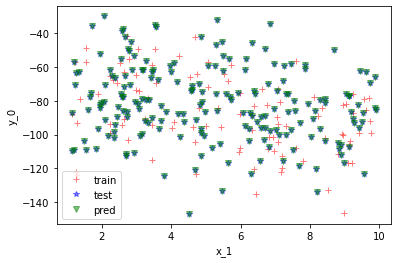

True parameters: w_true=[[-3.21752183]
 [-2.05270362]
 [-3.82980857]
 [-1.73805983]
 [ 0.82640919]
 [-2.98126335]
 [ 1.49863335]
 [-0.94158267]
 [-4.62980557]
 [ 3.44478304]], b_true=[-9.51555751]
Learned parameters: w=[[-3.21768561]
 [-2.05231524]
 [-3.82953266]
 [-1.73804031]
 [ 0.82675624]
 [-2.98124626]
 [ 1.49881744]
 [-0.94091692]
 [-4.62930234]
 [ 3.44506337]], b=[[-9.52974388]]
The distance between w_true and w: 0.0010880399335908282
The distance between b_true and b: 0.014186365756534869
The distance between y_pred and y_test: 0.04165170185928465


num_features = 10, num_targets = 10


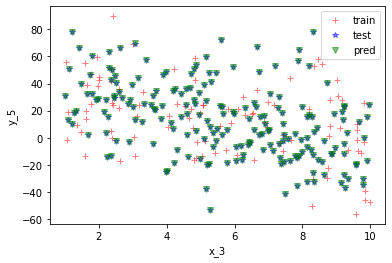

True parameters: w_true=[[ 3.31021752  4.78112587  0.48845696  1.15966355  0.31051358 -3.03365154
   0.13922217 -4.69825762  0.93422619 -4.76356998]
 [ 4.6151644   2.73573985  2.61736693 -1.89772402  4.12809853  4.62514452
  -0.74596665 -0.38435889  1.90956948 -3.99398874]
 [-0.61142883 -1.16772602 -1.80907673  1.81442844 -4.54781178  2.34072879
  -0.41297319 -4.27491731 -3.33423731  3.74378395]
 [-0.8483535  -4.67657719 -0.69362454 -2.59308263 -0.83931922 -3.22350136
  -4.68627621 -3.71717334  2.62588002  1.52929807]
 [-2.57645387 -2.83091026 -4.41810015  2.09832932 -4.0061787   4.30851567
   1.60757768  0.39828351 -3.34980971  4.09108289]
 [ 2.82942422  0.14991677  4.15079648  0.54418897  0.77293639  1.37503211
   0.50965776 -4.82501361  1.73755366  4.36834669]
 [-1.27968001  4.69791023 -4.60636046 -0.91691882  2.84889579 -3.15989234
   0.77162878  3.43778632 -0.69267431 -2.9597002 ]
 [ 2.90471212  3.18937749 -1.19433063 -4.42376435 -4.39720243  3.38880707
   0.40551414  0.3835128   

In [353]:
noise_level = 0.01
for i, (num_features, num_targets) in enumerate([(1, 1), (10, 1), (10, 10)]):
    print(f'num_features = {num_features}, num_targets = {num_targets}')
    # generate evaluation dataset
    (x_train, y_train), (x_test, y_test), (w_true, b_true) = generate_evaluation_data(num_features, num_targets, noise_level)

    # Use x_train and y_train as training data to fit your model;
    # then calculate the prediction y_pred for x_test
    w, b = linear_regression_params(x_train, y_train)
    y_pred = linear_regression_predict(w, b, x_test)

    # visualize the results
    i = np.random.choice(num_features) # if there are multiple predictors (features), randomly select one to plot as x
    j = np.random.choice(num_targets) # if there are multiple targets
    plt.plot(x_train[:, i], y_train[:, j], 'r+', label='train', alpha=0.5)
    plt.plot(x_test[:, i], y_test[:, j], 'b*', label='test', alpha=0.5)
    plt.plot(x_test[:, i], y_pred[:, j], 'gv', label='pred', alpha=0.5)
    plt.xlabel(f'x_{i}')
    plt.ylabel(f'y_{j}')
    plt.legend()
    plt.show()
    # print result summary
    print(f'True parameters: w_true={w_true}, b_true={b_true}')
    print(f'Learned parameters: w={w}, b={b}')
    print(f'The distance between w_true and w: {np.linalg.norm(w_true - w)}')
    print(f'The distance between b_true and b: {np.linalg.norm(b_true - b)}')
    print(f'The distance between y_pred and y_test: {np.linalg.norm(y_test - y_pred)}\n\n')